<a href="https://colab.research.google.com/github/Chiporito93/MLtareas/blob/main/Dasf2_Titanic_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧪 Actividad Evaluada: Árboles de Decisión en el Dataset Titanic

📚 **Curso:** Machine Learning

## 📝 Instrucciones
- Este notebook debe ser completado individualmente y subido a la plataforma del curso.
- Responde todas las celdas marcadas como código y asegúrate de que el notebook se ejecute sin errores.
- Puedes usar material del curso y documentación oficial de Python y Scikit-learn.

## 📄 Descripción del Dataset
El dataset **Titanic** contiene información sobre los pasajeros del famoso barco Titanic que naufragó en 1912. El objetivo es predecir si un pasajero sobrevivió o no (`Survived` = 1 si sobrevivió, 0 si no), a partir de variables como edad, clase, sexo, y punto de embarque.

Este conjunto de datos es ampliamente utilizado en aprendizaje automático como un primer ejemplo de clasificación supervisada.

---

# 🌊 Actividad Evaluada: Árboles de Decisión con el Dataset Titanic

En esta actividad aplicarás un modelo de árboles de decisión sobre el dataset Titanic.

### 🎯 Objetivos:
- Cargar y explorar el dataset
- Preprocesar las variables categóricas con One Hot Encoding
- Entrenar un árbol de decisión
- Visualizar el árbol
- Evaluar el desempeño del modelo

🕐 Tiempo estimado: 60 a 90 minutos

In [ ]:
# 📥 Cargar el dataset desde la URL de Kaggle (alternativamente cargar localmente)
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
import pandas as pd
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 🔍 1. Exploración inicial del dataset

Antes de comenzar a entrenar modelos de Machine Learning, es fundamental **comprender la estructura y el contenido del conjunto de datos**. En esta sección, deberás realizar una exploración básica del dataset Titanic para identificar:

- Las columnas disponibles y sus tipos de datos (`.info()`)
- Las estadísticas descriptivas de las variables numéricas (`.describe()`)
- La existencia de valores faltantes (`.isnull().sum()`)

Estas acciones te permitirán decidir qué pasos de limpieza y preprocesamiento son necesarios. **Recuerda comentar brevemente tus observaciones** al final de esta sección, por ejemplo: si hay columnas con muchos datos faltantes, si hay outliers o si ciertas variables parecen poco informativas.

In [ ]:
# Se puede observar que el dataset no esta completo y tiene variables numericas y categoricas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Se puede observar los minimos y maximos de la edad, el precio del boleto numero de padres y hermanos
# Pero tambien se observa que el id no es necesario para el analisis
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

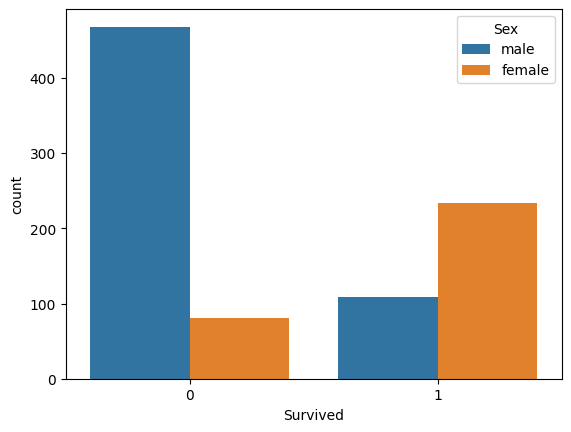

In [ ]:
import seaborn as sb
sb.countplot(x='Survived', data=df, hue='Sex')

In [ ]:
# Se puede observar que 177 datos del nombre 687 de la cabina y 2 de embarque estan vacios
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 🧹 2. Preprocesamiento

Antes de entrenar un modelo de Machine Learning, es necesario **preparar adecuadamente los datos**. Este proceso se conoce como *preprocesamiento* y consiste en dejar el conjunto de datos en un formato que los algoritmos puedan utilizar de manera efectiva.

### Pasos a seguir:

1. **Eliminar columnas innecesarias**: Algunas columnas como `PassengerId`, `Name`, `Ticket` o `Cabin` no aportan información útil al modelo o contienen datos difíciles de procesar automáticamente (como texto libre o demasiados valores únicos).

2. **Manejo de valores faltantes**:
   - La columna `Age` tiene valores faltantes que puedes reemplazar por la **mediana**, ya que es menos sensible a valores extremos.
   - La columna `Embarked` tiene pocos valores faltantes, así que puedes usar la **moda** (valor más frecuente) para completarlos.

3. **Codificación de variables categóricas**:
   - Los algoritmos no pueden trabajar directamente con texto. Por eso, aplicamos **One Hot Encoding** a las variables categóricas como `Sex` y `Embarked`, transformándolas en columnas binarias (0 y 1).
   - Usar `drop_first=True` evita multicolinealidad y reduce la cantidad de columnas.

> ⚠️ **Importante:** El preprocesamiento tiene un gran impacto en la calidad del modelo. Un paso mal hecho puede afectar seriamente el desempeño del algoritmo.

Al finalizar esta etapa, deberías tener un dataset **limpio, sin valores nulos y completamente numérico**.

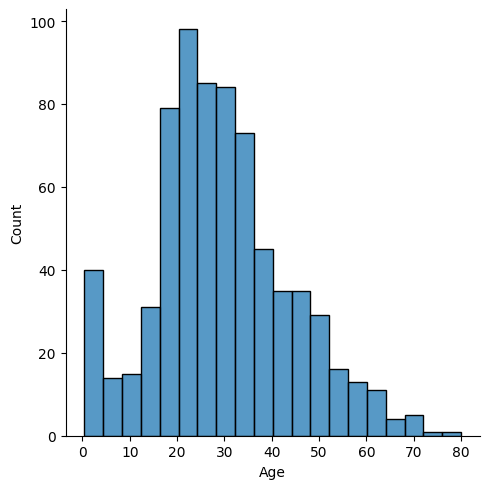

In [ ]:
sb.displot(x='Age', data=df)

In [ ]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [ ]:
df['Age'].mean()

np.float64(29.69911764705882)

In [ ]:
df['Age'].fillna(df['Age'].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [ ]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [ ]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
df=df.drop(columns=['Cabin'])

In [ ]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [ ]:
df=df.dropna(subset=['Embarked'])

In [ ]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [ ]:
df=df.drop(columns=['Ticket','Name','PassengerId'])

In [ ]:
dummies_sex = pd.get_dummies(df['Sex'], drop_first=True).astype(int)

In [ ]:
df=df.join(dummies_sex)

In [ ]:
df=df.drop(columns=['Sex'])

<Axes: xlabel='Survived', ylabel='count'>

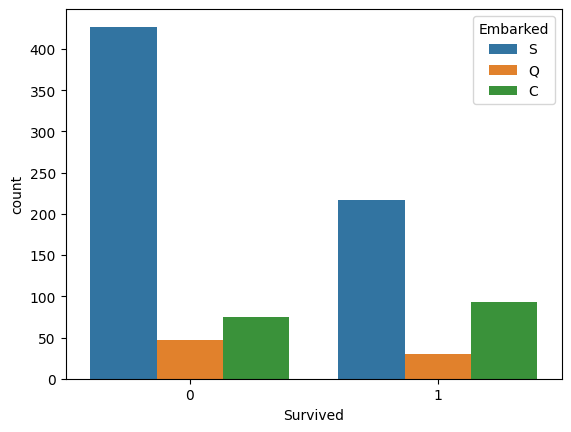

In [ ]:
sb.countplot(x='Survived', data=df, hue='Embarked')

In [ ]:
dummies_embarked = pd.get_dummies(df['Embarked'], drop_first=True).astype(int)

In [ ]:
df=df.join(dummies_embarked)
df=df.drop(columns=['Embarked'])

<Axes: >

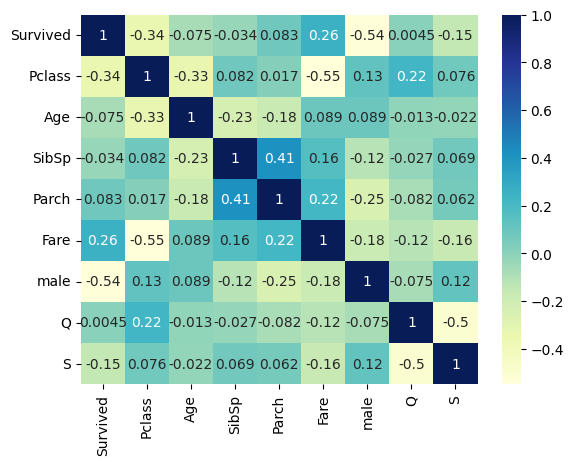

In [ ]:
# quiero el heatmap de la correlacion entre las variables
sb.heatmap(df.corr(), annot=True, cmap='YlGnBu')

<Axes: xlabel='Survived', ylabel='count'>

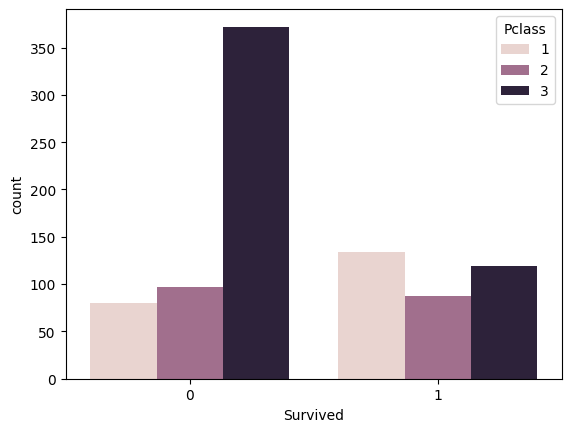

In [ ]:
# countplot de los sobrevivientes por clase
sb.countplot(x='Survived', data=df, hue='Pclass')


## 🧠 3. Entrenamiento del modelo de Árbol de Decisión

En esta etapa, construiremos un modelo predictivo utilizando un **Árbol de Decisión**, una técnica de clasificación que divide los datos en ramas sucesivas para tomar decisiones basadas en las características del conjunto de datos.

### Pasos a seguir:

1. **Separar las variables predictoras (X) y la variable objetivo (y)**.  
   En este caso, `Survived` será nuestra variable objetivo, y el resto de las columnas las usaremos como predictores.

2. **Dividir los datos en conjuntos de entrenamiento y prueba**.  
   Esto se hace para evaluar el modelo con datos que no ha visto antes. Usa `train_test_split` para crear una división, por ejemplo 70% entrenamiento y 30% prueba.

3. **Crear y entrenar el modelo con `DecisionTreeClassifier`**.  
   Puedes usar el parámetro `max_depth` para limitar la profundidad del árbol y evitar sobreajuste.

Cuando termines esta sección, tu modelo estará entrenado y listo para ser evaluado y visualizado.

In [ ]:
# crea una variable x que es df pero sin survived
X = df.drop(columns=['Survived'])
# crea una variable y que es df pero solo con survived
y = df['Survived']

In [ ]:
# Separa el dataset en train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# crea el modelo de arbol de decision
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=50)
# entrena el modelo
model.fit(X_train, y_train)
# predice el modelo
y_pred = model.predict(X_test)


In [ ]:
# la exactitud del modelo
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.74


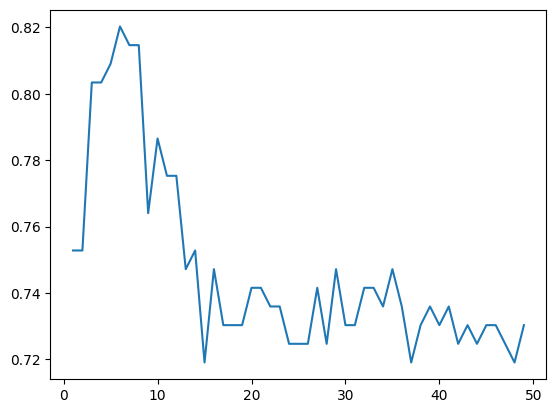

In [ ]:
# crea un lazo for para iterar y ver la mejor profundidad del arbol
depths = range(1, 50)
accuracies = []
for i in depths:
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
# grafica la exactitud del modelo
import matplotlib.pyplot as plt
plt.plot(depths, accuracies)

In [ ]:
model = DecisionTreeClassifier(max_depth=8)
# entrena el modelo
model.fit(X_train, y_train)
# predice el modelo
y_pred = model.predict(X_test)

## 🌳 4. Visualización del árbol

Una de las grandes ventajas de los árboles de decisión es que su estructura se puede visualizar de forma intuitiva, lo que facilita la **interpretación del modelo**.

En esta sección usaremos la función `plot_tree()` de `sklearn` para graficar el árbol entrenado. En el gráfico:

- Cada **nodo interno** representa una condición de decisión sobre alguna variable.
- Cada **rama** muestra el resultado de esa decisión (verdadero o falso).
- Cada **nodo terminal** (o hoja) muestra la clase predicha y cuántas muestras llegaron a ese punto.

### Sugerencia:
Puedes ajustar los parámetros de `plot_tree()` como `feature_names`, `class_names` y `filled=True` para mejorar la legibilidad del árbol. Asegúrate de usar `plt.figure(figsize=(ancho, alto))` para que la visualización no se corte.

**Objetivo:** Entender cómo el modelo está tomando decisiones, qué variables usa y con qué prioridad.

[Text(0.4576388888888889, 0.9444444444444444, 'male <= 0.5\n0.477\n711\n[432, 279]\nMurió'),
 Text(0.18819444444444444, 0.8333333333333334, 'Pclass <= 2.5\n0.355\n247\n[57, 190]\nVivió'),
 Text(0.32291666666666663, 0.8888888888888888, 'True  '),
 Text(0.05277777777777778, 0.7222222222222222, 'Age <= 2.5\n0.096\n138\n[7, 131]\nVivió'),
 Text(0.022222222222222223, 0.6111111111111112, 'Pclass <= 1.5\n0.5\n2\n[1, 1]\nMurió'),
 Text(0.011111111111111112, 0.5, '0.0\n1\n[1, 0]\nMurió'),
 Text(0.03333333333333333, 0.5, '0.0\n1\n[0, 1]\nVivió'),
 Text(0.08333333333333333, 0.6111111111111112, 'Fare <= 26.125\n0.084\n136\n[6, 130]\nVivió'),
 Text(0.05555555555555555, 0.5, 'Age <= 56.0\n0.174\n52\n[5, 47]\nVivió'),
 Text(0.044444444444444446, 0.3888888888888889, 'SibSp <= 0.5\n0.145\n51\n[4, 47]\nVivió'),
 Text(0.022222222222222223, 0.2777777777777778, 'Age <= 37.0\n0.054\n36\n[1, 35]\nVivió'),
 Text(0.011111111111111112, 0.16666666666666666, '0.0\n24\n[0, 24]\nVivió'),
 Text(0.03333333333333333, 

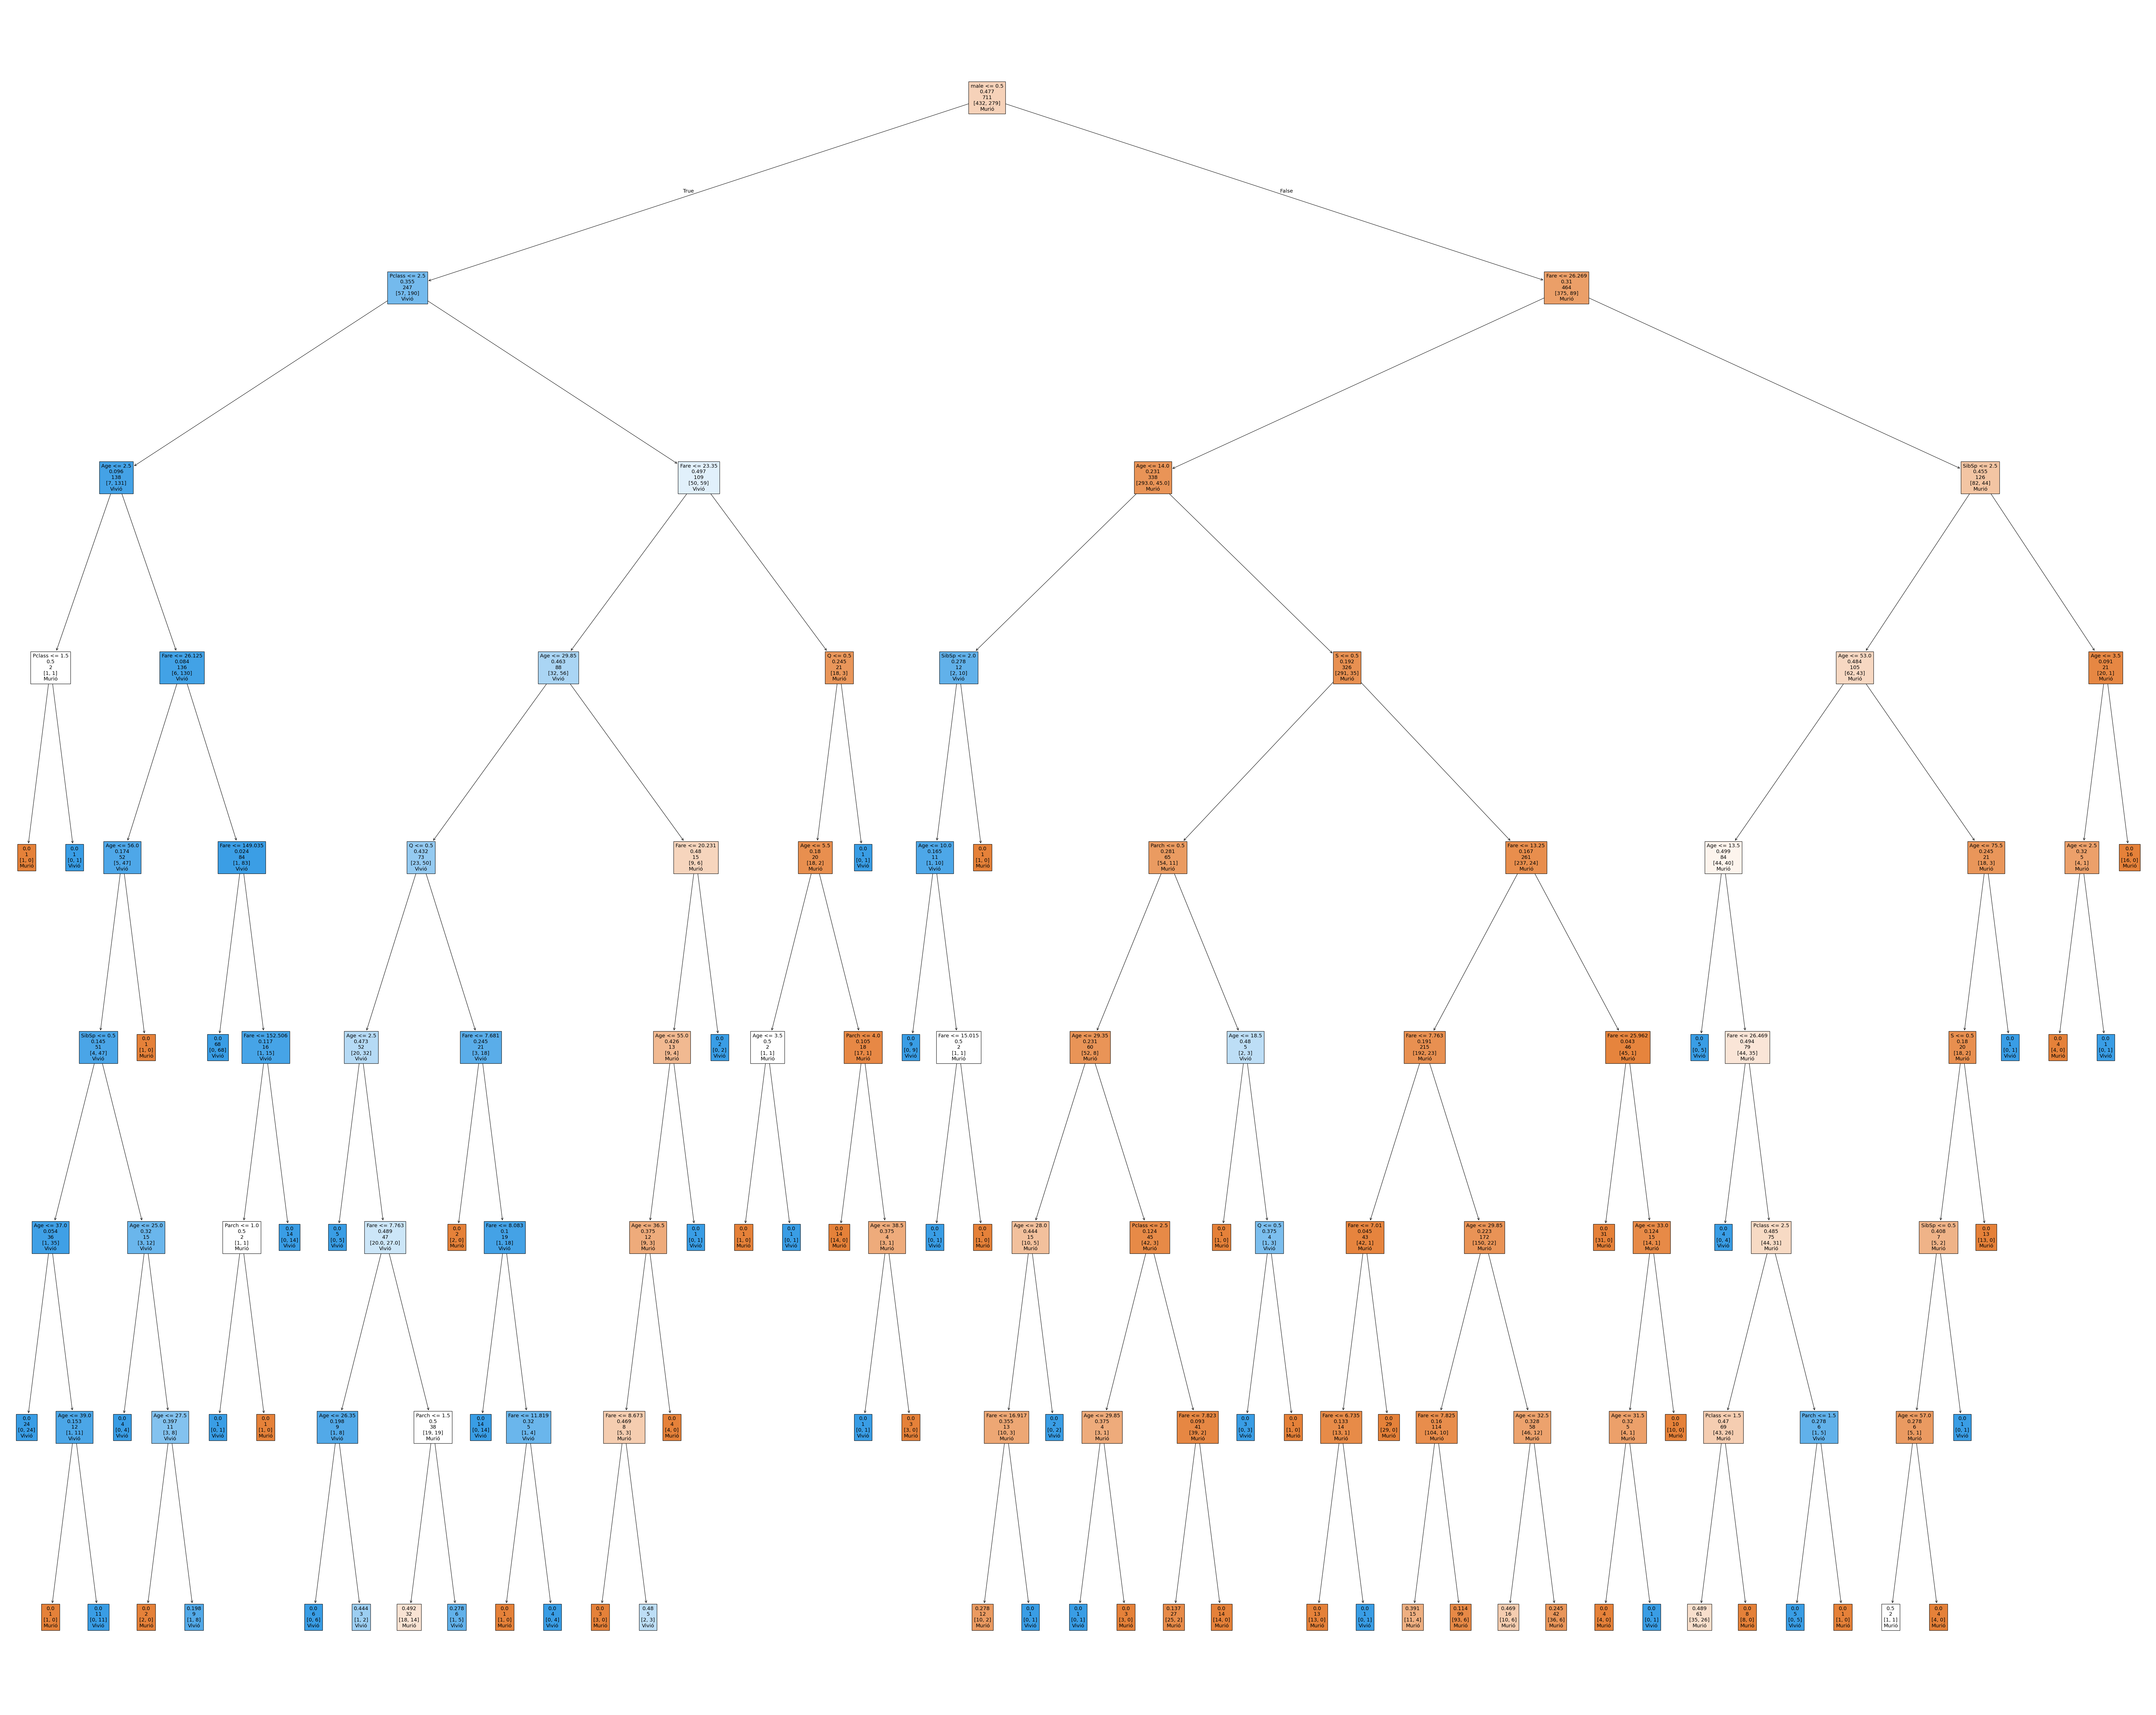

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(100,80))
plot_tree(model, feature_names=X_train.columns, class_names=["Murió", "Vivió"], filled=True, label="none")


## 📈 5. Evaluación del modelo

Una vez entrenado el modelo, es fundamental **evaluar su desempeño** para entender qué tan bien está funcionando. En esta sección usaremos datos de prueba (no vistos por el modelo durante el entrenamiento) para calcular métricas que nos ayuden a juzgar la calidad de las predicciones.

### Métricas que utilizaremos:

- **Matriz de confusión (`confusion_matrix`)**: muestra la cantidad de verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos. Es útil para entender errores específicos del modelo.
- **Reporte de clasificación (`classification_report`)**: incluye precisión (*precision*), exhaustividad (*recall*), y la métrica F1 para cada clase.
- **Exactitud (`accuracy_score`)**: indica qué porcentaje total de predicciones fue correcto.

Estas métricas te permitirán **identificar si el modelo está desbalanceado**, si tiende a predecir más una clase que otra, y si necesita ajustes en parámetros o preprocesamiento.

> 💡 Recuerda: un modelo con buena precisión pero bajo *recall* puede ser problemático si nos interesa no dejar pasar casos positivos (como sobrevivientes).

In [ ]:
# la exactitud del modelo
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.81


In [ ]:
# crea el reporte del clasificador
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       117
           1       0.76      0.67      0.71        61

    accuracy                           0.81       178
   macro avg       0.80      0.78      0.79       178
weighted avg       0.81      0.81      0.81       178



In [ ]:
# con dataframe de confusion
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=['Predicted No', 'Predicted Yes'],
             index=['Actual No', 'Actual Yes'])


,Predicted No,Predicted Yes
Actual No,104,13
Actual Yes,20,41


---
## 🤔 Preguntas de Reflexión

Responde brevemente las siguientes preguntas al final de tu actividad. Puedes escribir tus respuestas directamente bajo cada pregunta:

1. ¿Qué variables crees que fueron más importantes para predecir la supervivencia? ¿Por qué?

2. ¿Qué limitaciones puede tener un árbol de decisión si no se controla su profundidad?

3. ¿Qué diferencias habría si usáramos codificación ordinal en lugar de One Hot Encoding?

4. ¿Qué cambiarías en el preprocesamiento o configuración del modelo para mejorar los resultados?

5. ¿Crees que este modelo se puede usar directamente en un entorno real? ¿Qué consideraciones éticas o técnicas deberías tener?


**1. ¿Qué variables crees que fueron más importantes para predecir la supervivencia? ¿Por qué?**

In [ ]:
# Lo mas importaante fue el sexo, ya que ser hombre implica alta mortalidad
# Otra varaible importante es la clase, si se viaja en tercera clase es probable que uno termine muerto


**2. ¿Qué limitaciones puede tener un árbol de decisión si no se controla su profundidad?**

In [ ]:
# Muy profundo puede dar overfiting


**3. ¿Qué diferencias habría si usáramos codificación ordinal en lugar de One Hot Encoding?**

In [ ]:
# El modelo pude empezar a relacionar que una variable tiene mas peso solo por ser mas grande, por eso es preferible hacer
# one hot encoding para evitar que el modelo relacione el tamaño de la variable con su importancia


**4. ¿Qué cambiarías en el preprocesamiento o configuración del modelo para mejorar los resultados?**

In [ ]:
# Yo normalizaria las variables numericas para que el modelo no relacione el tamaño de la variable con su importancia, ademas
# trataria de tener un dataset balanceado, ya que si no el modelo puede aprender a predecir solo una clase y no la otra
# Ademas de hacer un analisis de outliers para ver si hay datos que no tienen sentido y pueden afectar el modelo
# Trataria de llenar informacion en lugar de quitar


**5. ¿Crees que este modelo se puede usar directamente en un entorno real? ¿Qué consideraciones éticas o técnicas deberías tener?**

In [ ]:
# Pienso que si se puede usar en un entorno real, porque de hecho el modelo es muy bueno y tiene una buena exactitud
# Se debe evitar usar sesgos en el preprocesamiento como asumir supuestos por nuestra forma de pensar
# Pienso que se debe garantizar la veracidad de la infromacion del dataset
# El modelo es una aproximacion de la realidad y por lo tanto existe un margen de error que siempre debe ser comunicado


In [ ]:
# Estare atento a comentarios u observaciones
# Daniel Sanchez